In [10]:
import pandas as pd
import numpy as np
import random

In [11]:
# Ship parts database: dictionary of all relevant parts and their attributes
parts = {
    # Weapons
    "Ion Cannon":      {"attack_dice": 1, "damage": 1, "initiative_bonus": 0, "to_hit_bonus": 0,
                        "shield": 0, "hull": 0, "missile": False, "ignore_shield": False, "energy": 0},
    "Plasma Cannon":   {"attack_dice": 1, "damage": 2, "initiative_bonus": 0, "to_hit_bonus": 0,
                        "shield": 0, "hull": 0, "missile": False, "ignore_shield": False, "energy": 2},
    "Antimatter Cannon": {"attack_dice": 1, "damage": 4, "initiative_bonus": 0, "to_hit_bonus": 0,
                          "shield": 0, "hull": 0, "missile": False, "ignore_shield": False, "energy": 4},
    "Plasma Missile":  {"attack_dice": 2, "damage": 2, "initiative_bonus": 0, "to_hit_bonus": 0,
                        "shield": 0, "hull": 0, "missile": True, "ignore_shield": False, "energy": 0},  # one-shot
    "Flux Missile":    {"attack_dice": 2, "damage": 1, "initiative_bonus": 2, "to_hit_bonus": 0,
                        "shield": 0, "hull": 0, "missile": True, "ignore_shield": False, "energy": 0},  # +2 init, one-shot
    "Ion Disruptor":   {"attack_dice": 1, "damage": 1, "initiative_bonus": 3, "to_hit_bonus": 0,
                        "shield": 0, "hull": 0, "missile": False, "ignore_shield": False, "energy": 1},
    "Soliton Cannon":  {"attack_dice": 1, "damage": 3, "initiative_bonus": 0, "to_hit_bonus": 0,
                        "shield": 0, "hull": 0, "missile": False, "ignore_shield": False, "energy": 3},
    "Rift Cannon":     {"attack_dice": 1, "damage": 3, "initiative_bonus": 0, "to_hit_bonus": 0,
                        "shield": 0, "hull": 0, "missile": False, "ignore_shield": True, "energy": 0},  # ignores shields
    # Computers
    "Electron Computer": {"attack_dice": 0, "damage": 0, "initiative_bonus": 0, "to_hit_bonus": 1,
                          "shield": 0, "hull": 0, "missile": False, "ignore_shield": False, "energy": 0},
    "Positron Computer": {"attack_dice": 0, "damage": 0, "initiative_bonus": 1, "to_hit_bonus": 2,
                          "shield": 0, "hull": 0, "missile": False, "ignore_shield": False, "energy": 1},
    "Gluon Computer":    {"attack_dice": 0, "damage": 0, "initiative_bonus": 2, "to_hit_bonus": 3,
                          "shield": 0, "hull": 0, "missile": False, "ignore_shield": False, "energy": 2},
    # Shields
    "Gauss Shield":   {"attack_dice": 0, "damage": 0, "initiative_bonus": 0, "to_hit_bonus": 0,
                       "shield": 1, "hull": 0, "missile": False, "ignore_shield": False, "energy": 0},
    "Phase Shield":   {"attack_dice": 0, "damage": 0, "initiative_bonus": 0, "to_hit_bonus": 0,
                       "shield": 2, "hull": 0, "missile": False, "ignore_shield": False, "energy": 1},
    "Flux Shield":    {"attack_dice": 0, "damage": 0, "initiative_bonus": 0, "to_hit_bonus": 0,
                       "shield": 3, "hull": 0, "missile": False, "ignore_shield": False, "energy": 2},
    "Absorption Shield": {"attack_dice": 0, "damage": 0, "initiative_bonus": 0, "to_hit_bonus": 0,
                       "shield": 1, "hull": 0, "missile": False, "ignore_shield": False, "energy": -4},
    # Hull
    'Hull':             {"attack_dice": 0, "damage": 0, "initiative_bonus": 0, "to_hit_bonus": 0,
                       "shield": 0, "hull": 1, "missile": False, "ignore_shield": False, "energy": 0},
    "Improved Hull":  {"attack_dice": 0, "damage": 0, "initiative_bonus": 0, "to_hit_bonus": 0,
                       "shield": 0, "hull": 2, "missile": False, "ignore_shield": False, "energy": 0},
    "Shard Hull":     {"attack_dice": 0, "damage": 0, "initiative_bonus": 0, "to_hit_bonus": 0,
                       "shield": 0, "hull": 3, "missile": False, "ignore_shield": False, "energy": 0},  # introduced in expansions
    "Sentient Hull":  {"attack_dice": 0, "damage": 0, "initiative_bonus": 0, "to_hit_bonus": 1,
                       "shield": 0, "hull": 1, "missile": False, "ignore_shield": False, "energy": 0},  # another advanced hull
    "Conifield Hull":  {"attack_dice": 0, "damage": 0, "initiative_bonus": 0, "to_hit_bonus": 0,
                       "shield": 0, "hull": 3, "missile": False, "ignore_shield": False, "energy": 2}, 
    # Drives
    "Nuclear Drive":  {"attack_dice": 0, "damage": 0, "initiative_bonus": 1, "to_hit_bonus": 0,
                       "shield": 0, "hull": 0, "missile": False, "ignore_shield": False, "energy": 1},
    "Fusion Drive":   {"attack_dice": 0, "damage": 0, "initiative_bonus": 2, "to_hit_bonus": 0,
                       "shield": 0, "hull": 0, "missile": False, "ignore_shield": False, "energy": 2},
    "Tachyon Drive":  {"attack_dice": 0, "damage": 0, "initiative_bonus": 3, "to_hit_bonus": 0,
                       "shield": 0, "hull": 0, "missile": False, "ignore_shield": False, "energy": 3},
    "Jump Drive":     {"attack_dice": 0, "damage": 0, "initiative_bonus": 1, "to_hit_bonus": 0,
                       "shield": 0, "hull": 0, "missile": False, "ignore_shield": False, "energy": 1},  # special: allows ignoring wormholes (not needed in combat)
    "Transition Drive": {"attack_dice": 0, "damage": 0, "initiative_bonus": -1, "to_hit_bonus": 0,
                         "shield": 0, "hull": 0, "missile": False, "ignore_shield": False, "energy": 0},
    # Energy Sources
    "Nuclear Source": {"attack_dice": 0, "damage": 0, "initiative_bonus": 0, "to_hit_bonus": 0,
                       "shield": 0, "hull": 0, "missile": False, "ignore_shield": False, "energy": -3},  # provides 3 energy
    "Fusion Source":  {"attack_dice": 0, "damage": 0, "initiative_bonus": 0, "to_hit_bonus": 0,
                       "shield": 0, "hull": 0, "missile": False, "ignore_shield": False, "energy": -6},
    "Tachyon Source": {"attack_dice": 0, "damage": 0, "initiative_bonus": 0, "to_hit_bonus": 0,
                       "shield": 0, "hull": 0, "missile": False, "ignore_shield": False, "energy": -9},
    "Zero Source":    {"attack_dice": 0, "damage": 0, "initiative_bonus": 0, "to_hit_bonus": 0,
                       "shield": 0, "hull": 0, "missile": False, "ignore_shield": False, "energy": -12},
    "Muon Source":    {"attack_dice": 0, "damage": 0, "initiative_bonus": 1, "to_hit_bonus": 0,
                       "shield": 0, "hull": 0, "missile": False, "ignore_shield": False, "energy": -2},
    # Special
    "Morph Shield":   {"attack_dice": 0, "damage": 0, "initiative_bonus": 0, "to_hit_bonus": 0,
                       "shield": 0, "hull": 0, "missile": False, "ignore_shield": False, "energy": 1, "regen": 1}
}
# Ensure default 'regen' key exists for all parts (0 if not specified)
for part in parts.values():
    part.setdefault("regen", 0)

# Base stats for ship classes (base initiative and base hull icons)
base_initiative = {"Interceptor": 2, "Cruiser": 1, "Dreadnought": 0, "Starbase": 0, "Ancient": 2}
base_hull_icons = {"Interceptor": 0, "Cruiser": 0, "Dreadnought": 0, "Starbase": 0, "Ancient": 0}
# By default assume each ship has a basic Nuclear Source (3 energy) unless a better source is explicitly added.
base_energy_source = {"Interceptor": "Nuclear Source", "Cruiser": "Nuclear Source",
                      "Dreadnought": "Nuclear Source", "Starbase": "Nuclear Source"}

def create_blueprint(ship_type, part_names):
    """
    Construct a ship blueprint for a given ship class and list of parts.
    Calculates initiative, attack dice, damage, shields, etc., and checks energy usage.
    """
    # start with base stats
    init = base_initiative.get(ship_type, 0)
    to_hit = 0
    shield_val = 0
    hull_icons = base_hull_icons.get(ship_type, 0)
    regen = 0
    energy_total = 0  # positive for consumption, negative for generation
    
    weapons = []   # list of normal weapons (dice and damage)
    missiles = []  # list of missile weapons
    
    for name in part_names:
        if name not in parts:
            raise ValueError(f"Unknown part name: {name}")
        part = parts[name]
        # add part's contributions
        init += part["initiative_bonus"]
        to_hit += part["to_hit_bonus"]
        shield_val += part["shield"]
        hull_icons += part["hull"]
        regen += part.get("regen", 0)
        energy_total += part["energy"]
        # categorize weapon if any dice
        if part["attack_dice"] > 0:
            weapon_info = {"damage": part["damage"], "dice": part["attack_dice"], "ignore_shield": part["ignore_shield"]}
            if part["missile"]:
                missiles.append(weapon_info)
            else:
                weapons.append(weapon_info)
    
    # If no explicit energy source part was added and ship requires base power:
    has_source = any(parts[name]["energy"] < 0 for name in part_names)
    if not has_source:
        # add default base source
        energy_total += parts[base_energy_source.get(ship_type, "Nuclear Source")]["energy"]
    
    # Calculate total hull points: base 1 HP plus one per hull icon (including pre-printed and added)
    total_hull_points = 1 + hull_icons
    
    blueprint = {
        "type": ship_type,
        "initiative": init,
        "to_hit_bonus": to_hit,
        "shield": shield_val,
        "max_hp": total_hull_points,
        "weapons": weapons,
        "missiles": missiles,
        "regen": regen,
        "energy_balance": -energy_total  # store as negative consumption (so positive means leftover capacity)
    }
    # If energy_balance is negative, it means net consumption > production
    if blueprint["energy_balance"] > 0:
        print(f"Warning: {ship_type} design has energy deficit of {-blueprint['energy_balance']} (needs more energy sources).")
    return blueprint

def build_gcds_blueprint(variant = 1):
    # GCDS blueprint from standard config
    # effectively: base type "GCDS" => 6 hull icons => 7 HP total 
    
    
    if variant == 1 :
        parts_for_gcds = [
            "Ion Cannon", "Ion Cannon", "Ion Cannon", "Ion Cannon",
            "Plasma Cannon", "Plasma Cannon",
            "Positron Computer",
            "Phase Shield",
            # We'll rely on the base_energy_source[GCDS] = "Tachyon Source" for big negative energy
            # or we can explicitly add "Tachyon Source" here
            # "Tachyon Source"
        ]
    elif variant == 2:  
        parts_for_gcds = [
            "Ion Cannon", "Ion Cannon", "Ion Cannon", "Ion Cannon",
            "Plasma Cannon", "Plasma Cannon",
            "Positron Computer",
            "Phase Shield",
            # We'll rely on the base_energy_source[GCDS] = "Tachyon Source" for big negative energy
            # or we can explicitly add "Tachyon Source" here
            # "Tachyon Source"
        ]
        #need to fil this out
    return create_blueprint("GCDS", parts_for_gcds)

def build_ancient_blueprint():
    """
    The base Ancient typically has:
     - 2 HP total (Hull and base)
     - 2 Ion Cannons
     - +1 computers
     - No missiles
    """
    parts_for_ancient = [
        "Ion Cannon", "Ion Cannon", 'Hull', 'Electron Computer'
        
    ]
    return create_blueprint("Ancient", parts_for_ancient)





# Example: Define a blueprint for a Dreadnought with certain upgrades
dread_blueprint = create_blueprint("Dreadnought", ["Plasma Cannon", "Ion Cannon", 
                                                  "Electron Computer", "Fusion Drive", 
                                                  "Improved Hull", "Fusion Source"])
print(dread_blueprint)


{'type': 'Dreadnought', 'initiative': 2, 'to_hit_bonus': 1, 'shield': 0, 'max_hp': 3, 'weapons': [{'damage': 2, 'dice': 1, 'ignore_shield': False}, {'damage': 1, 'dice': 1, 'ignore_shield': False}], 'missiles': [], 'regen': 0, 'energy_balance': 2}


In [12]:
ancient = build_ancient_blueprint()

In [13]:
ancient

{'type': 'Ancient',
 'initiative': 2,
 'to_hit_bonus': 1,
 'shield': 0,
 'max_hp': 2,
 'weapons': [{'damage': 1, 'dice': 1, 'ignore_shield': False},
  {'damage': 1, 'dice': 1, 'ignore_shield': False}],
 'missiles': [],
 'regen': 0,
 'energy_balance': 3}

In [14]:
dread_blueprint 

{'type': 'Dreadnought',
 'initiative': 2,
 'to_hit_bonus': 1,
 'shield': 0,
 'max_hp': 3,
 'weapons': [{'damage': 2, 'dice': 1, 'ignore_shield': False},
  {'damage': 1, 'dice': 1, 'ignore_shield': False}],
 'missiles': [],
 'regen': 0,
 'energy_balance': 2}

In [15]:
## combat simulation functions

In [16]:
import random

def simulate_battle(fleetA, fleetB, attacker='A', retreat_threshold=0, debug=False):
    """
    Simulate a battle between two fleets: fleetA and fleetB.
    Each fleet is a list of dicts: {"count": int, "blueprint": blueprint_dict}
      e.g. [{"count":3, "blueprint": cruiser_blueprint}, ...]

    'attacker': 'A' or 'B'
    'retreat_threshold': fraction. If side's total HP < threshold * enemy's total HP, attempt retreat.
    
    'debug': bool (default False). If True, prints out each side's rolls, their adjusted values,
                 and the damage dealt to individual ships.

    Returns: a dict with:
     {
       "winner": 'A' or 'B' or None,
       "damageA": total damage side A dealt,
       "damageB": total damage side B dealt
       "shipsA_left": remaining ships for side A,
       "shipsB_left": remaining ships for side B
     }
    """
    ## TODO REWORK RETREAT LOGIC IR GET RID OF IT
    # Convert fleets into lists of actual ships with HP
    shipsA = []
    for group in fleetA:
        for _ in range(group["count"]):
            bp = group["blueprint"]
            shipsA.append({
                "bp": bp,
                "hp": bp["max_hp"],
                "retreating": False
            })
    shipsB = []
    for group in fleetB:
        for _ in range(group["count"]):
            bp = group["blueprint"]
            shipsB.append({
                "bp": bp,
                "hp": bp["max_hp"],
                "retreating": False
            })
    
    defender = 'B' if attacker == 'A' else 'A'
    damageA = 0
    damageB = 0

    # 5a) Missile Phase
    # Gather missile attacks from each side, sorted by initiative desc with tie going to defender
    def get_missile_attacks(ships_list, side_label):
        # returns list of (initiative, side, total_dice, damage, ignore_shield)
        attacks = []
        for sh in ships_list:
            bp = sh["bp"]
            for m in bp["missiles"]:
                attacks.append((
                    bp["initiative"],
                    side_label,
                    m["dice"],
                    m["damage"],
                    m["ignore_shield"]
                ))
        return attacks
    
    missilesA = get_missile_attacks(shipsA, 'A')
    missilesB = get_missile_attacks(shipsB, 'B')
    all_missiles = missilesA + missilesB
    # sort by initiative desc, break ties with defender first
    all_missiles.sort(key=lambda x: (x[0], x[1] != defender), reverse=True)

    def apply_missile_volley(side, dice_count, dmg, ignore_shield, shipsA, shipsB):
        nonlocal damageA, damageB

        if side == 'A':
            attacker_bp = None  # (original code sets this to None for missiles)
            targets = shipsB
        else:
            attacker_bp = None
            targets = shipsA

        hits = 0
        # Roll dice
        for _ in range(dice_count):
            r = random.randint(1,6)
            # The original code references bp['to_hit_bonus'] here but 'bp' is not in scope,
            # effectively making it 0. We'll keep that exact behavior.
            r_comp = r + 0
            if debug:
                print(f"[MISSILE-ROLL] side={side}, raw_roll={r}, roll_plus_bonus={r_comp}", end=' ')
            if r_comp >= 6:
                hits += 1
                if debug:
                    print("-> HIT")
            elif r == 1:
                if debug:
                    print("-> MISS (rolled a 1)")
            else:
                if debug:
                    print("-> MISS")

        if debug and dice_count > 0:
            print(f"[MISSILE] side={side}: total hits={hits}, damage each={dmg}")

        # apply hits
        for _ in range(hits):
            if not targets:
                break
            # pick target with lowest HP
            targets.sort(key=lambda s: s["hp"])
            tgt = targets[0]
            old_hp = tgt["hp"]
            tgt["hp"] -= dmg
            if side == 'A':
                damageA += dmg
            else:
                damageB += dmg

            if debug:
                print(f"   -> Target HP went from {old_hp} to {tgt['hp']}")

            if tgt["hp"] <= 0:
                if debug:
                    print("   -> Target destroyed!")
                targets.pop(0)

    if debug and all_missiles:
        print("\n=== MISSILE PHASE START ===")
    for init_val, side_label, dice_ct, dmg, ign_shld in all_missiles:
        if not shipsA or not shipsB:
            break
        if debug:
            print(f"[MISSILE PHASE] initiative={init_val}, side={side_label}, dice={dice_ct}, "
                  f"dmg={dmg}, ignore_shield={ign_shld}")
        apply_missile_volley(side_label, dice_ct, dmg, ign_shld, shipsA, shipsB)
    if debug and all_missiles:
        print("=== MISSILE PHASE END ===\n")

    # remove destroyed ships
    shipsA = [s for s in shipsA if s["hp"] > 0]
    shipsB = [s for s in shipsB if s["hp"] > 0]

    # check if immediate winner
    if not shipsA:
        return {
            "winner": 'B', "damageA": damageA, "damageB": damageB,
            "shipsA_left": 0, "shipsB_left": len(shipsB)
        }
    if not shipsB:
        return {
            "winner": 'A', "damageA": damageA, "damageB": damageB,
            "shipsA_left": len(shipsA), "shipsB_left": 0
        }

    # 5b) Engagement Rounds
    round_num = 0
    while shipsA and shipsB:
        round_num += 1
        if debug:
            print(f"\n=== ENGAGEMENT ROUND {round_num} ===")

        # sort by initiative desc, tie => defender first
        ship_order = []
        for s in shipsA:
            ship_order.append((s["bp"]["initiative"], 'A', s))
        for s in shipsB:
            ship_order.append((s["bp"]["initiative"], 'B', s))
        ship_order.sort(key=lambda x: (x[0], x[1] != defender), reverse=True)

        # track if retreat declared
        retreat_declared = {"A": False, "B": False}

        i = 0
        while i < len(ship_order):
            init_val = ship_order[i][0]
            # gather all ships at this initiative
            same_init = []
            while i < len(ship_order) and ship_order[i][0] == init_val:
                same_init.append(ship_order[i])
                i += 1

            # sort same_init so that defender goes first if tie
            same_init.sort(key=lambda x: (x[1] != defender))

            for (ini, side, ship_obj) in same_init:
                # skip if destroyed
                if ship_obj["hp"] <= 0:
                    continue
                # skip if no enemies remain
                if not shipsA or not shipsB:
                    break

                # check retreat logic
                if not retreat_declared[side]:
                    own_ships = shipsA if side == 'A' else shipsB
                    enemy_ships = shipsB if side == 'A' else shipsA
                    own_hp = sum(s["hp"] for s in own_ships)
                    enemy_hp = sum(s["hp"] for s in enemy_ships)
                    if enemy_hp and (own_hp < retreat_threshold * enemy_hp):
                        ship_obj["retreating"] = True
                        retreat_declared[side] = True
                        if debug:
                            print(f"[RETREAT] side={side} at initiative={ini} (hp ratio below {retreat_threshold}).")
                        continue

                # otherwise, attack
                bp = ship_obj["bp"]
                dice_rolls = []
                for w in bp["weapons"]:
                    for _ in range(w["dice"]):
                        r = random.randint(1,6)
                        dice_rolls.append((r, w["damage"], w["ignore_shield"]))

                # sort the dice by descending damage so big hits get allocated first
                dice_rolls_sorted = sorted(dice_rolls, key=lambda x: x[1], reverse=True)
                enemy_list = shipsB if side == 'A' else shipsA

                if debug:
                    print(f"[ATTACK] side={side}, initiative={ini}, ship HP={ship_obj['hp']}, #weapons_dice={len(dice_rolls_sorted)}")

                for (roll_val, w_dmg, w_ign_shld) in dice_rolls_sorted:
                    # check for hit
                    eff = roll_val + bp["to_hit_bonus"]
                    if roll_val == 6:
                        hit = True
                    elif roll_val == 1:
                        hit = False
                    else:
                        if not enemy_list:
                            break
                        min_shield = min(e["bp"]["shield"] for e in enemy_list)
                        if w_ign_shld:
                            needed = 6
                        else:
                            needed = 6 + min_shield
                        hit = (eff >= needed)

                    if debug:
                        print(f"  roll={roll_val}, roll+bonus={eff}, dmg={w_dmg}, ignore_shield={w_ign_shld}, hit={hit}", end='')

                    if hit and enemy_list:
                        enemy_list.sort(key=lambda s: s["hp"])
                        tgt = enemy_list[0]
                        old_hp = tgt["hp"]
                        tgt["hp"] -= w_dmg
                        if side == 'A':
                            damageA += w_dmg
                        else:
                            damageB += w_dmg
                        if debug:
                            print(f" -> target HP {old_hp} -> {tgt['hp']}")
                        if tgt["hp"] <= 0:
                            if debug:
                                print("    (target destroyed!)")
                            enemy_list.pop(0)
                            if not enemy_list:
                                break
                    else:
                        if debug:
                            print(" -> no damage")

        # remove destroyed ships
        shipsA = [s for s in shipsA if s["hp"]>0]
        shipsB = [s for s in shipsB if s["hp"]>0]

        # apply retreat
        if retreat_declared['A']:
            shipsA = [s for s in shipsA if not s["retreating"]]
        if retreat_declared['B']:
            shipsB = [s for s in shipsB if not s["retreating"]]

        # regeneration
        for s in shipsA:
            if s["bp"]["regen"] > 0 and s["hp"] > 0:
                s["hp"] = min(s["hp"] + s["bp"]["regen"], s["bp"]["max_hp"])
        for s in shipsB:
            if s["bp"]["regen"] > 0 and s["hp"] > 0:
                s["hp"] = min(s["hp"] + s["bp"]["regen"], s["bp"]["max_hp"])

        # check if one side is all gone
        if not shipsA:
            return {
                "winner": 'B', "damageA": damageA, "damageB": damageB,
                "shipsA_left": 0, "shipsB_left": len(shipsB)
            }
        if not shipsB:
            return {
                "winner": 'A', "damageA": damageA, "damageB": damageB,
                "shipsA_left": len(shipsA), "shipsB_left": 0
            }

    # if we get here, possibly everyone destroyed or partial
    if not shipsA and not shipsB:
        return {
            "winner": None, "damageA": damageA, "damageB": damageB,
            "shipsA_left": 0, "shipsB_left": 0
        }
    elif not shipsA:
        return {
            "winner": 'B', "damageA": damageA, "damageB": damageB,
            "shipsA_left": 0, "shipsB_left": len(shipsB)
        }
    elif not shipsB:
        return {
            "winner": 'A', "damageA": damageA, "damageB": damageB,
            "shipsA_left": len(shipsA), "shipsB_left": 0
        }
    else:
        return {
            "winner": None, "damageA": damageA, "damageB": damageB,
            "shipsA_left": len(shipsA), "shipsB_left": len(shipsB)
        }


In [23]:
# Monte Carlo simulation for the example scenario
import math

def run_monte_carlo(fleetA, fleetB, n=1000, attacker='A', retreat_threshold = 0:
    """
    Run n simulations, returning stats about outcomes in a format usable by visualize_combat_results.
    """
    # Internal tallies
    tally = {
        'A_wins': 0,
        'B_wins': 0,
        'draws': 0,
        'damageA': [],
        'damageB': [],
        'shipsA_left': [],
        'shipsB_left': []
    }

    for _ in range(n):
        outcome = simulate_battle(fleetA, fleetB, attacker=attacker, retreat_threshold = retreat_threshold)
        w = outcome["winner"]
        if w == 'A':
            tally['A_wins'] += 1
        elif w == 'B':
            tally['B_wins'] += 1
        else:
            tally['draws'] += 1
        
        tally['damageA'].append(outcome["damageA"])
        tally['damageB'].append(outcome["damageB"])
        tally['shipsA_left'].append(outcome["shipsA_left"])
        tally['shipsB_left'].append(outcome["shipsB_left"])
    
    # Package results in the format visualize_combat_results expects
    return {
        'win_count_A': tally['A_wins'],
        'win_count_B': tally['B_wins'],
        'draws': tally['draws'],
        'damage_A': tally['damageA'],
        'damage_B': tally['damageB'],
        'ships_left_A': tally['shipsA_left'],
        'ships_left_B': tally['shipsB_left']
    }



In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def visualize_combat_results(results):
    """
    Create a dashboard summary and detailed histograms for Eclipse combat simulation results.
    results: dict with keys like 'win_count_A', 'win_count_B', 'damage_A', 'damage_B'
    """
    # Extract win counts and damage arrays from results dict
    wins_A = results.get('win_count_A', results.get('wins_A', 0))
    wins_B = results.get('win_count_B', results.get('wins_B', 0))
    if wins_A is None or wins_B is None and 'wins' in results:
        # If wins are provided as a sub-dictionary or tuple
        if isinstance(results['wins'], dict):
            wins_A = results['wins'].get('A', 0)
            wins_B = results['wins'].get('B', 0)
        elif isinstance(results['wins'], (list, tuple)):
            wins_A, wins_B = results['wins'][0], results['wins'][1]
    damage_A = np.array(results.get('damage_A', []))
    damage_B = np.array(results.get('damage_B', []))
    total_sims = wins_A + wins_B if (wins_A is not None and wins_B is not None and wins_A + wins_B > 0) else len(damage_A)
    # Compute win percentages
    win_pct_A = (wins_A / total_sims * 100) if total_sims > 0 else 0.0
    win_pct_B = (wins_B / total_sims * 100) if total_sims > 0 else 0.0
    # Compute damage statistics
    exp_damage_A = float(np.mean(damage_A)) if damage_A.size > 0 else 0.0
    exp_damage_B = float(np.mean(damage_B)) if damage_B.size > 0 else 0.0
    std_damage_A = float(np.std(damage_A)) if damage_A.size > 0 else 0.0
    std_damage_B = float(np.std(damage_B)) if damage_B.size > 0 else 0.0

    # Set up figure with GridSpec for custom layout
    fig = plt.figure(figsize=(12, 8))
    gs = GridSpec(nrows=2, ncols=6, height_ratios=[1, 2], figure=fig)
    # Top-row axes (each takes 2 columns of the grid)
    ax_win = fig.add_subplot(gs[0, 0:2])
    ax_dmg = fig.add_subplot(gs[0, 2:4])
    ax_std = fig.add_subplot(gs[0, 4:6])
    # Bottom-row axes (damage distribution histograms)
    ax_histA = fig.add_subplot(gs[1, 0:3])
    ax_histB = fig.add_subplot(gs[1, 3:6])

    # Define color palette for Fleet A and Fleet B
    color_A = "#1f77b4"  # blue (Fleet A)
    color_B = "#ff7f0e"  # orange (Fleet B)

    # --- 1. Dashboard Summary Bar Charts ---
    # Win Percentage bars
    ax_win.bar(["Fleet A", "Fleet B"], [win_pct_A, win_pct_B], color=[color_A, color_B])
    ax_win.set_title("Win Percentage")
    ax_win.set_ylabel("Win %")
    ax_win.set_ylim(0, 100)
    # Annotate win % above bars
    for i, pct in enumerate([win_pct_A, win_pct_B]):
        ax_win.text(i, pct + 3, f"{pct:.1f}%", ha='center', va='bottom', fontsize=9)
    # Expected Damage bars
    ax_dmg.bar(["Fleet A", "Fleet B"], [exp_damage_A, exp_damage_B], color=[color_A, color_B])
    ax_dmg.set_title("Expected Damage")
    ax_dmg.set_ylabel("Damage")
    # Annotate mean damage above bars
    for i, dmg in enumerate([exp_damage_A, exp_damage_B]):
        ax_dmg.text(i, dmg + 0.05 * max(std_damage_A, std_damage_B, 1), f"{dmg:.1f}", 
                    ha='center', va='bottom', fontsize=9)
    # Damage Std Dev bars
    ax_std.bar(["Fleet A", "Fleet B"], [std_damage_A, std_damage_B], color=[color_A, color_B])
    ax_std.set_title("Damage Std. Dev.")
    ax_std.set_ylabel("Damage")
    # Annotate std dev above bars
    for i, sd in enumerate([std_damage_A, std_damage_B]):
        ax_std.text(i, sd + 0.05 * max(std_damage_A, std_damage_B, 1), f"{sd:.2f}", 
                    ha='center', va='bottom', fontsize=9)

    # --- 2. Detailed Damage Distribution Histograms ---
    # Fleet A histogram
    if damage_A.size > 0:
        # Use up to 30 bins or fewer if distinct values are limited
        bins_A = min(30, len(np.unique(damage_A)))
        ax_histA.hist(damage_A, bins=bins_A, color=color_A, alpha=0.7, edgecolor='black')
        # Expected value line (vertical red dashed line)
        ax_histA.axvline(exp_damage_A, color='red', linestyle='--', linewidth=1.5, label='Expected Value')
        # Shaded ±1 std dev region (semi-transparent red rectangle)
        ax_histA.axvspan(exp_damage_A - std_damage_A, exp_damage_A + std_damage_A, color='red', alpha=0.1, label='±1 Std Dev')
    else:
        ax_histA.text(0.5, 0.5, "No data", ha='center', va='center', transform=ax_histA.transAxes)
    ax_histA.set_title("Fleet A Damage Distribution")
    ax_histA.set_xlabel("Damage Dealt")
    ax_histA.set_ylabel("Frequency")
    ax_histA.legend(loc='upper right')  # legend for mean and std dev

    # Fleet B histogram
    if damage_B.size > 0:
        bins_B = min(30, len(np.unique(damage_B)))
        ax_histB.hist(damage_B, bins=bins_B, color=color_B, alpha=0.7, edgecolor='black')
        ax_histB.axvline(exp_damage_B, color='red', linestyle='--', linewidth=1.5, label='Expected Value')
        ax_histB.axvspan(exp_damage_B - std_damage_B, exp_damage_B + std_damage_B, color='red', alpha=0.1, label='±1 Std Dev')
    else:
        ax_histB.text(0.5, 0.5, "No data", ha='center', va='center', transform=ax_histB.transAxes)
    ax_histB.set_title("Fleet B Damage Distribution")
    ax_histB.set_xlabel("Damage Dealt")
    ax_histB.set_ylabel("Frequency")
    ax_histB.legend(loc='upper right')

    # Tight layout for neat spacing
    plt.tight_layout()
    return fig  # Return the figure object for further use (display or save)



In [9]:
# #Example 1: Single GCDS vs 3 Cruisers from Terrans
if __name__ == "__main__":
    gcds_bp = build_gcds_blueprint()

    # Let's define a Terran Cruiser design 
    terran_cruiser_bp = create_blueprint("Cruiser", [
        "Plasma Cannon", 
        "Electron Computer", 
        "Nuclear Drive",
        'Hull'
        # automatically adds base "Nuclear Source" if none given
    ])

    # Build fleets
    fleetA = [
        {"count": 1, "blueprint": gcds_bp}
    ]
    fleetB = [
        {"count": 3, "blueprint": terran_cruiser_bp}
    ]

    # Quick single run
    outcome = simulate_battle(fleetA, fleetB, attacker='B', debug = True)  
#     # let's say the Terrans are attacking GCDS, so attacker='B' means GCDS is side B, Terrans side A (or vice versa).
    print("Single Simulation Outcome:", outcome)

#     # Monte Carlo
#     N=500
#     results = run_monte_carlo(fleetA, fleetB, n=N, attacker='B')
#     A_win_rate = results['A_wins']/N*100
#     B_win_rate = results['B_wins']/N*100
#     print(f"After {N} simulations: A_win_rate={A_win_rate:.1f}%, B_win_rate={B_win_rate:.1f}%, draws={results['draws']}")

#     # Plot damage distributions
#     plot_damage_distribution(results['damageA'], 
#                              title="Fleet A Damage Dealt - GCDS vs Terran Cruisers")
#     plot_damage_distribution(results['damageB'], 
#                              title="Fleet B Damage Dealt - GCDS vs Terran Cruisers")


=== ENGAGEMENT ROUND 1 ===
[ATTACK] side=B, initiative=2, ship HP=2, #weapons_dice=1
  roll=5, roll+bonus=6, dmg=2, ignore_shield=False, hit=False -> no damage
[ATTACK] side=B, initiative=2, ship HP=2, #weapons_dice=1
  roll=1, roll+bonus=2, dmg=2, ignore_shield=False, hit=False -> no damage
[ATTACK] side=B, initiative=2, ship HP=2, #weapons_dice=1
  roll=4, roll+bonus=5, dmg=2, ignore_shield=False, hit=False -> no damage
[RETREAT] side=A at initiative=1 (hp ratio below 0.5).
Single Simulation Outcome: {'winner': 'B', 'damageA': 0, 'damageB': 0, 'shipsA_left': 0, 'shipsB_left': 3}


In [24]:

# Let's define a Terran Cruiser design 
hull_cruiser_bp = create_blueprint("Cruiser", [
    "Ion Cannon", 
    "Electron Computer", 
    "Nuclear Drive",
    'Improved Hull',
    'Improved Hull'
    # automatically adds base "Nuclear Source" if none given
])

# Build fleets
fleetA = [
    {"count": 1, "blueprint": ancient}
]
fleetB = [
    {"count": 1, "blueprint": hull_cruiser_bp}
]

# Quick single run
outcome = simulate_battle(fleetA, fleetB, attacker='B', retreat_threshold=0, debug = True)  


=== ENGAGEMENT ROUND 1 ===
[ATTACK] side=A, initiative=2, ship HP=2, #weapons_dice=2
  roll=2, roll+bonus=3, dmg=1, ignore_shield=False, hit=False -> no damage
  roll=1, roll+bonus=2, dmg=1, ignore_shield=False, hit=False -> no damage
[ATTACK] side=B, initiative=2, ship HP=5, #weapons_dice=1
  roll=3, roll+bonus=4, dmg=1, ignore_shield=False, hit=False -> no damage

=== ENGAGEMENT ROUND 2 ===
[ATTACK] side=A, initiative=2, ship HP=2, #weapons_dice=2
  roll=5, roll+bonus=6, dmg=1, ignore_shield=False, hit=True -> target HP 5 -> 4
  roll=4, roll+bonus=5, dmg=1, ignore_shield=False, hit=False -> no damage
[ATTACK] side=B, initiative=2, ship HP=4, #weapons_dice=1
  roll=3, roll+bonus=4, dmg=1, ignore_shield=False, hit=False -> no damage

=== ENGAGEMENT ROUND 3 ===
[ATTACK] side=A, initiative=2, ship HP=2, #weapons_dice=2
  roll=2, roll+bonus=3, dmg=1, ignore_shield=False, hit=False -> no damage
  roll=5, roll+bonus=6, dmg=1, ignore_shield=False, hit=True -> target HP 4 -> 3
[ATTACK] side=

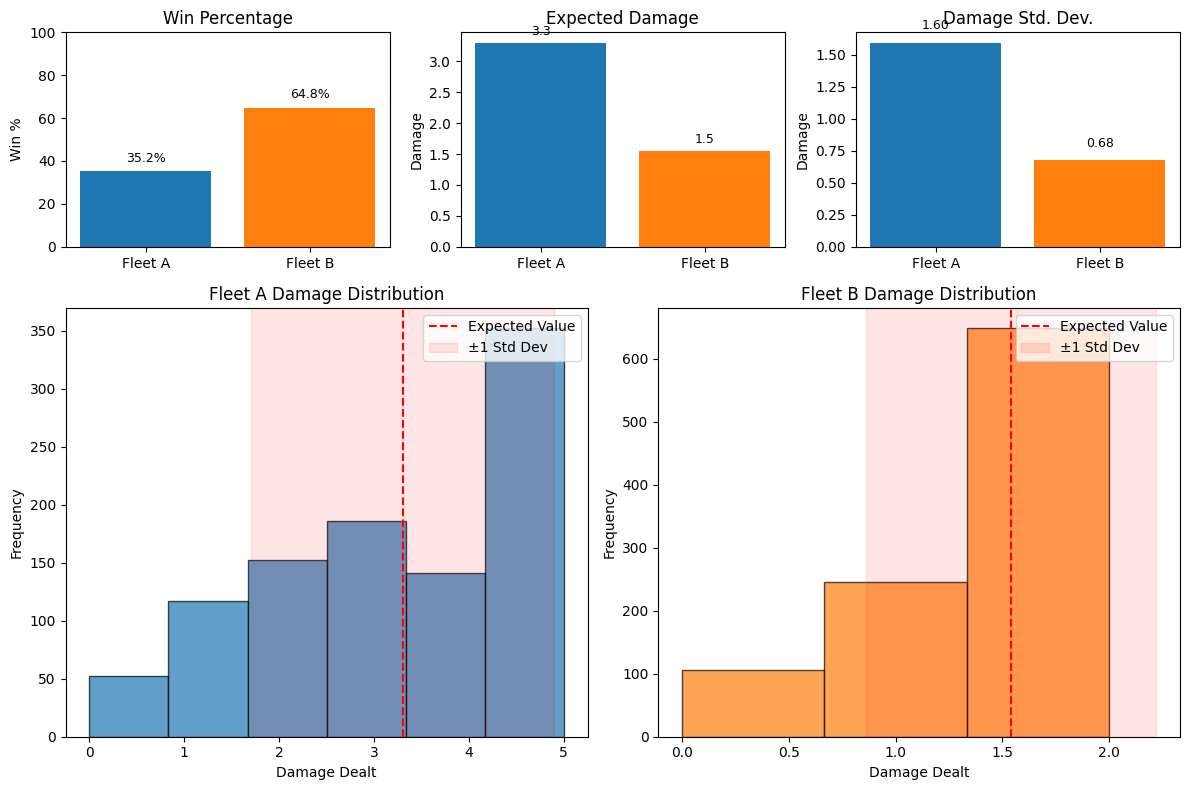

In [26]:
results = run_monte_carlo(fleetA, fleetB, attacker='B', retreat_threshold=0)
fig = visualize_combat_results(results)
plt.show()

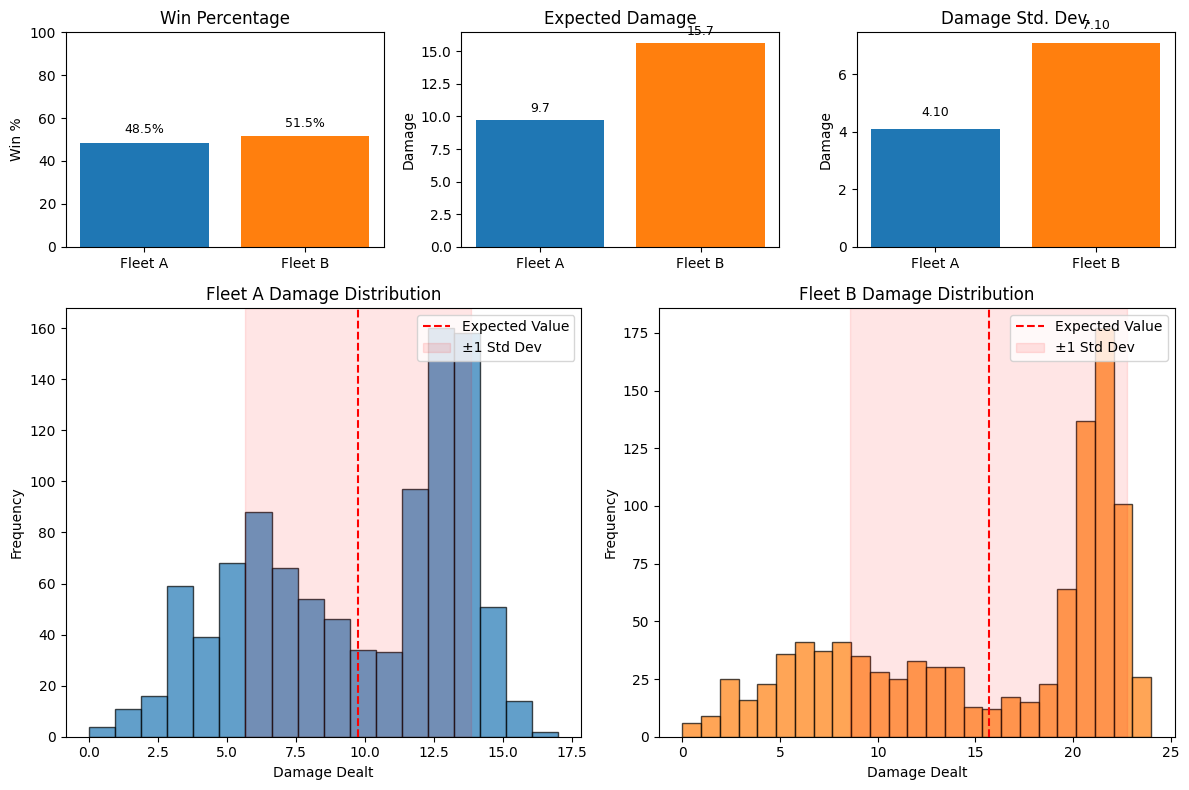

In [27]:
###############################################################################
# Example Blueprints and Fleets
###############################################################################

# Example: Creating a blueprint for a Dreadnought with a given module loadout.
# We assume you have a function like this in your code:
#   def create_blueprint(ship_type, modules):
#       ...
# which returns some dictionary or object describing that ship's stats or modules.

# Fleet A Blueprints
dread_blueprint_A = create_blueprint(
    "Dreadnought", 
    ["Plasma Cannon", "Ion Cannon", 
     "Electron Computer", "Fusion Drive", 
     "Improved Hull", "Fusion Source"]
)
cruiser_blueprint_A = create_blueprint(
    "Cruiser", 
    ["Plasma Cannon", "Electron Computer", 
     "Fusion Drive", "Improved Hull"]
)
interceptor_blueprint_A = create_blueprint(
    "Interceptor", 
    ["Ion Cannon", "Electron Computer", 
     "Fusion Drive", "Improved Hull"]
)

# Fleet B Blueprints
dread_blueprint_B = create_blueprint(
    "Dreadnought", 
    ["Plasma Cannon", "Plasma Cannon", 
     "Electron Computer", "Fusion Drive", 
     "Improved Hull", "Fusion Source"]
)
cruiser_blueprint_B = create_blueprint(
    "Cruiser", 
    ["Ion Cannon", "Electron Computer", 
     "Fusion Drive", "Improved Hull"]
)
interceptor_blueprint_B = create_blueprint(
    "Interceptor", 
    ["Plasma Cannon", "Electron Computer", 
     "Fusion Drive", "Hull"]  # Slightly different hull module
)

###############################################################################
# 2. Define Fleets using the {"count", "blueprint"} convention
###############################################################################
# Fleet A: 1 Dreadnought, 2 Cruisers, 3 Interceptors
fleetA = [
    {"count": 1, "blueprint": dread_blueprint_A},
    {"count": 2, "blueprint": cruiser_blueprint_A},
    {"count": 3, "blueprint": interceptor_blueprint_A},
]

# Fleet B: 2 Dreadnoughts, 1 Cruiser, 2 Interceptors
fleetB = [
    {"count": 2, "blueprint": dread_blueprint_B},
    {"count": 1, "blueprint": cruiser_blueprint_B},
    {"count": 2, "blueprint": interceptor_blueprint_B},
]


###############################################################################
# Running the Simulation
###############################################################################

###############################################################################
# 3. Run Monte Carlo Simulation and Visualize Results
###############################################################################
results = run_monte_carlo(fleetA, fleetB, n=1000, attacker='A')
fig = visualize_combat_results(results)
plt.show()


In [28]:
simulate_battle(fleetA, fleetB, attacker='B', debug = True) 


=== ENGAGEMENT ROUND 1 ===
[ATTACK] side=A, initiative=4, ship HP=3, #weapons_dice=1
  roll=6, roll+bonus=7, dmg=1, ignore_shield=False, hit=True -> target HP 2 -> 1
[ATTACK] side=A, initiative=4, ship HP=3, #weapons_dice=1
  roll=5, roll+bonus=6, dmg=1, ignore_shield=False, hit=True -> target HP 1 -> 0
    (target destroyed!)
[ATTACK] side=A, initiative=4, ship HP=3, #weapons_dice=1
  roll=6, roll+bonus=7, dmg=1, ignore_shield=False, hit=True -> target HP 2 -> 1
[ATTACK] side=B, initiative=4, ship HP=1, #weapons_dice=1
  roll=3, roll+bonus=4, dmg=2, ignore_shield=False, hit=False -> no damage
[ATTACK] side=A, initiative=3, ship HP=3, #weapons_dice=1
  roll=4, roll+bonus=5, dmg=2, ignore_shield=False, hit=False -> no damage
[ATTACK] side=A, initiative=3, ship HP=3, #weapons_dice=1
  roll=5, roll+bonus=6, dmg=2, ignore_shield=False, hit=True -> target HP 1 -> -1
    (target destroyed!)
[ATTACK] side=B, initiative=3, ship HP=3, #weapons_dice=1
  roll=1, roll+bonus=2, dmg=1, ignore_shiel

{'winner': 'A',
 'damageA': 11,
 'damageB': 2,
 'shipsA_left': 6,
 'shipsB_left': 0}

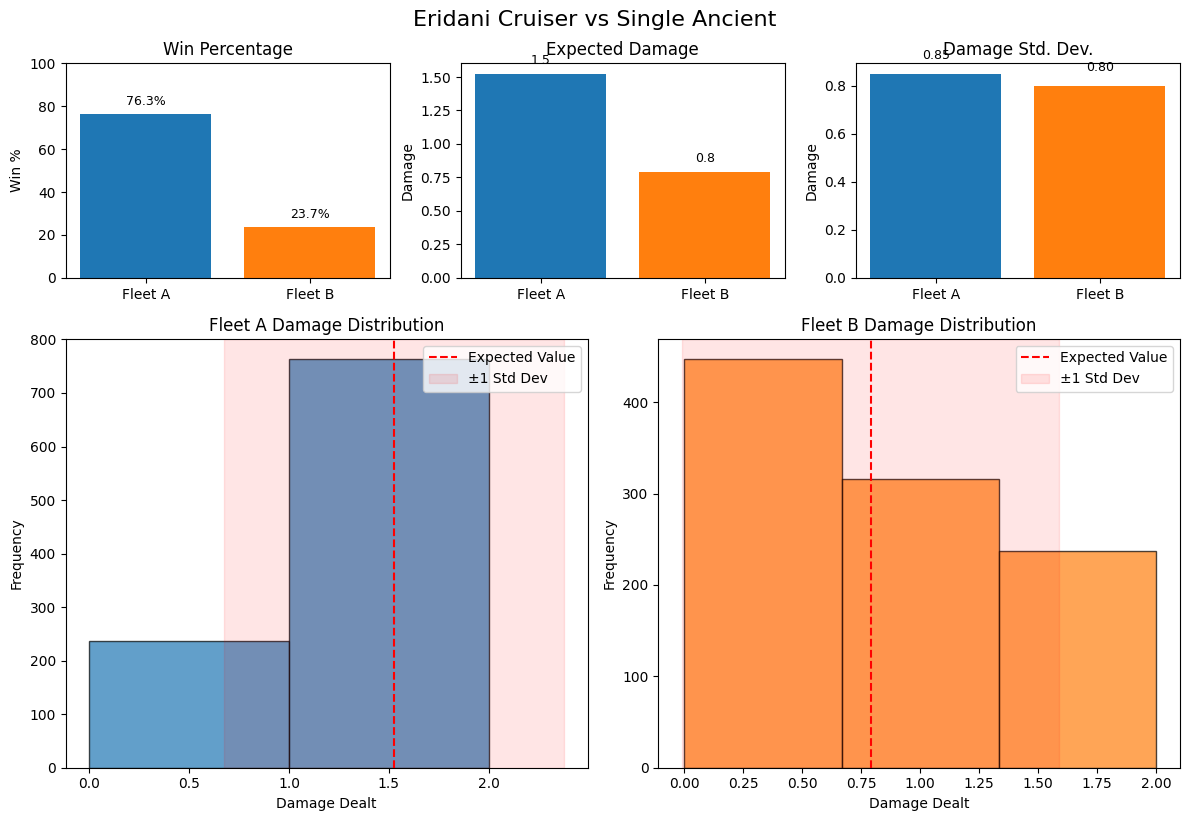

In [29]:
###############################################################################
# Example Blueprints and Fleets
###############################################################################

# Example: Creating a blueprint for a Dreadnought with a given module loadout.
# We assume you have a function like this in your code:
#   def create_blueprint(ship_type, modules):
#       ...
# which returns some dictionary or object describing that ship's stats or modules.

cruiser_blueprint_A = create_blueprint(
    "Cruiser", 
    ["Plasma Cannon", "Electron Computer", 
     "Nuclear Drive", "Gauss Shield", "Hull", "Nuclear Source"
    ]
)

interceptor_blueprint_A = create_blueprint(
    "Interceptor", 
    ["Ion Cannon", 
     "Nuclear Drive", "Nuclear Source" ]
)
ancient = build_ancient_blueprint()


###############################################################################
# 2. Define Fleets using the {"count", "blueprint"} convention
###############################################################################
# Fleet A: 1 Cruiser
fleetA = [

    {"count": 1, "blueprint": cruiser_blueprint_A },
]

# Fleet B: 1 ancient
fleetB = [
    {"count": 1, "blueprint": ancient},

]


###############################################################################
# Running the Simulation
###############################################################################

###############################################################################
# 3. Run Monte Carlo Simulation and Visualize Results
###############################################################################
results = run_monte_carlo(fleetA, fleetB, n=1000, attacker='A')
fig = visualize_combat_results(results)
fig.suptitle("Eridani Cruiser vs Single Ancient", fontsize=16, y=1.02) 
plt.show()

In [30]:
simulate_battle(fleetA, fleetB, attacker='A', debug = True) 


=== ENGAGEMENT ROUND 1 ===
[ATTACK] side=B, initiative=2, ship HP=2, #weapons_dice=2
  roll=2, roll+bonus=3, dmg=1, ignore_shield=False, hit=False -> no damage
  roll=4, roll+bonus=5, dmg=1, ignore_shield=False, hit=False -> no damage
[ATTACK] side=A, initiative=2, ship HP=2, #weapons_dice=1
  roll=1, roll+bonus=2, dmg=2, ignore_shield=False, hit=False -> no damage

=== ENGAGEMENT ROUND 2 ===
[ATTACK] side=B, initiative=2, ship HP=2, #weapons_dice=2
  roll=2, roll+bonus=3, dmg=1, ignore_shield=False, hit=False -> no damage
  roll=2, roll+bonus=3, dmg=1, ignore_shield=False, hit=False -> no damage
[ATTACK] side=A, initiative=2, ship HP=2, #weapons_dice=1
  roll=2, roll+bonus=3, dmg=2, ignore_shield=False, hit=False -> no damage

=== ENGAGEMENT ROUND 3 ===
[ATTACK] side=B, initiative=2, ship HP=2, #weapons_dice=2
  roll=5, roll+bonus=6, dmg=1, ignore_shield=False, hit=False -> no damage
  roll=3, roll+bonus=4, dmg=1, ignore_shield=False, hit=False -> no damage
[ATTACK] side=A, initiativ

{'winner': 'A', 'damageA': 2, 'damageB': 0, 'shipsA_left': 1, 'shipsB_left': 0}

In [31]:
cruiser_blueprint_A

{'type': 'Cruiser',
 'initiative': 2,
 'to_hit_bonus': 1,
 'shield': 1,
 'max_hp': 2,
 'weapons': [{'damage': 2, 'dice': 1, 'ignore_shield': False}],
 'missiles': [],
 'regen': 0,
 'energy_balance': 0}

In [32]:
ancient

{'type': 'Ancient',
 'initiative': 2,
 'to_hit_bonus': 1,
 'shield': 0,
 'max_hp': 2,
 'weapons': [{'damage': 1, 'dice': 1, 'ignore_shield': False},
  {'damage': 1, 'dice': 1, 'ignore_shield': False}],
 'missiles': [],
 'regen': 0,
 'energy_balance': 3}

In [33]:
interceptor_blueprint_A 

{'type': 'Interceptor',
 'initiative': 3,
 'to_hit_bonus': 0,
 'shield': 0,
 'max_hp': 1,
 'weapons': [{'damage': 1, 'dice': 1, 'ignore_shield': False}],
 'missiles': [],
 'regen': 0,
 'energy_balance': 2}

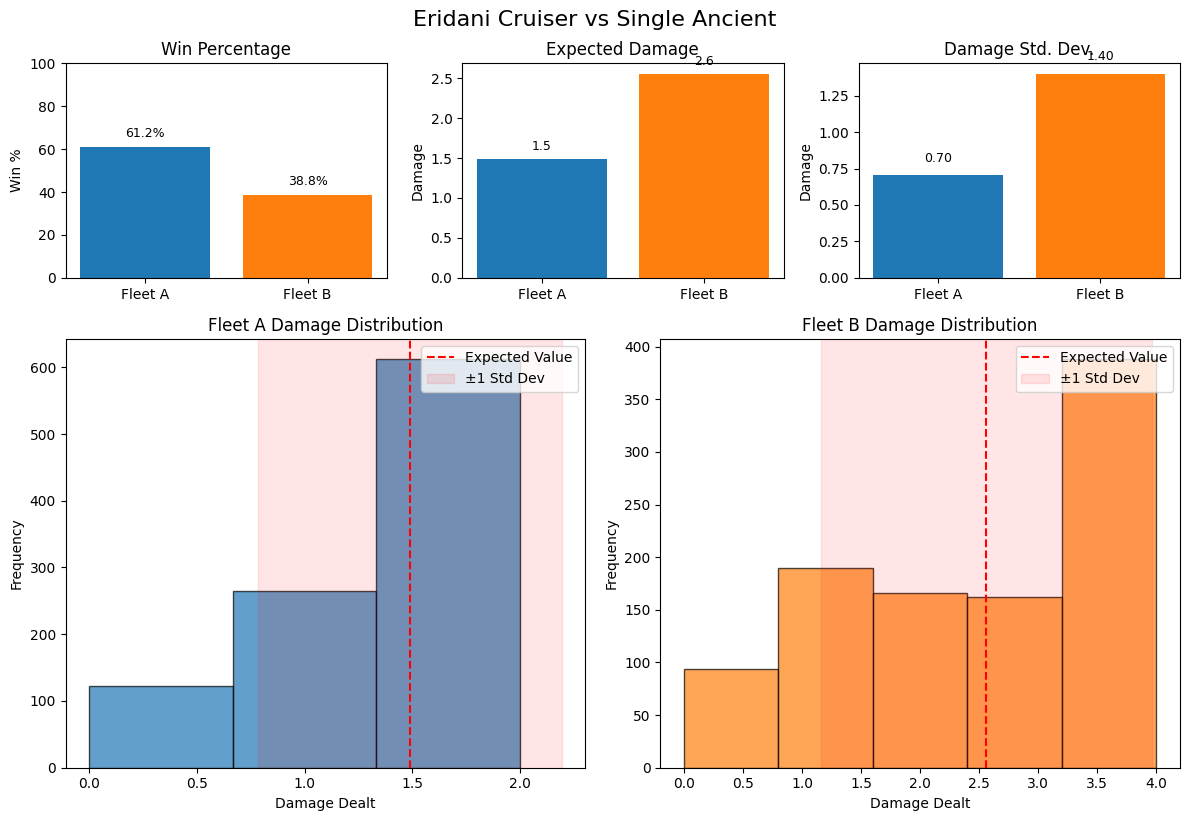

In [36]:
###############################################################################
# Example Blueprints and Fleets
###############################################################################

# Example: Creating a blueprint for a Dreadnought with a given module loadout.
# We assume you have a function like this in your code:
#   def create_blueprint(ship_type, modules):
#       ...
# which returns some dictionary or object describing that ship's stats or modules.

Dreadnaught_blueprint_A = create_blueprint(
    "Dreadnaught", 
    ["Ion Cannon", "Plasma Cannon",  "Electron Computer", "Phase Shield", "Hull", "Hull",
     "Nuclear Drive", "Nuclear Source" ]
)

cruiser_blueprint_A = create_blueprint(
    "Cruiser", 
    ["Ion Cannon", "Electron Computer", 
     "Fusion Drive", "Hull", "Improved Hull", "Nuclear Source"
    ]
)

interceptor_blueprint_A = create_blueprint(
    "Interceptor", 
    ["Ion Cannon", 
     "Nuclear Drive", "Nuclear Source" ]
)
ancient = build_ancient_blueprint()


###############################################################################
# 2. Define Fleets using the {"count", "blueprint"} convention
###############################################################################
# Fleet A: 1 Cruiser
fleetA = [

    {"count": 1, "blueprint": cruiser_blueprint_A},
]

# Fleet B: 1 ancient
fleetB = [
    {"count": 1, "blueprint": ancient},

]


###############################################################################
# Running the Simulation
###############################################################################

###############################################################################
# 3. Run Monte Carlo Simulation and Visualize Results
###############################################################################
results = run_monte_carlo(fleetA, fleetB, n=1000, attacker='A')
fig = visualize_combat_results(results)
fig.suptitle("Eridani Cruiser vs Single Ancient", fontsize=16, y=1.02) 
plt.show()

In [37]:
cruiser_blueprint_A

{'type': 'Cruiser',
 'initiative': 3,
 'to_hit_bonus': 1,
 'shield': 0,
 'max_hp': 4,
 'weapons': [{'damage': 1, 'dice': 1, 'ignore_shield': False}],
 'missiles': [],
 'regen': 0,
 'energy_balance': 1}